# Fisher’s Iris data set analysis using Python

This is a data set also known as Iris flower data set which was published by British statistician and biologist Ronald Fisher in 1936. [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

The data set consists of 150 records (50 for each of the three Iris species: Iris setosa, Iris versicolor and Iris virginica ) Each species in turn have four attributes which were measured: the length and the width of the sepals and petals in centimeters.
![title](Images/flowers.png)
(Sources: [1](https://commons.wikimedia.org/wiki/Category:Iris_setosa#/media/File:Irissetosa1.jpg), [2](https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_versicolor_3.jpg), [3](https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_virginica.jpg), Licenses: Public Domain)

<br>

## Saving original data set
***

In [1]:
# First of all before performing any analyses on the data set we need to import all the necessary modules  
# which we going to use in this project.

# For downloading.
from urllib.request import urlretrieve

# For numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# For plotting.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Assigning url of file. Idea taken from https://gist.github.com/curran/a08a1080b88344b0c8a7
iris='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# Saving file locally.
urlretrieve(iris)

# Read file into a DataFrame and assign column names. 
df = pd.read_csv(iris, sep=',', names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
# Prints dataframe head(first 10 elements)
print(df.head(10))

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [3]:
# Checking that whole data set has been imported (150 rows).
len(df)

150

<br>

## Looking at data

***
Before we start analysing the data set lets have a look at the data more closely using pandas functionality.

We can use <span style="color:SlateBlue; font-weight:bold;">columns</span> attribute to show the column labels of the DataFrame. <br>
Next, <span style="color:SlateBlue; font-weight:bold;">index</span> attribute shows RangeIndex(start, stop, step), index was automatically assigned when the csv file was read and df was created.<br>
<span style="color:SlateBlue; font-weight:bold;">ndim</span> parameter shows the number of axes/dimensions of the data set.<br>
<span style="color:SlateBlue; font-weight:bold;">shape</span> attribute can be used to show the number of rows (if used with index 0) and columns (if used with index 1) in the data set.<br>
<span style="color:SlateBlue; font-weight:bold;">size</span> attribute shows total number of elements in the DataFrame (150 rows x 5 columns = 750).<br>
<span style="color:SlateBlue; font-weight:bold;">dtypes</span> attribute shows the data types of the DataFrame.

In [4]:
print("The column labels of the iris DataFrame are: ", *df.columns, sep = "   ")
print(" The index of the DataFrame is: ", df.index, "\n")
print(f"The iris DataFrame has {df.ndim} dimensions")
print(f"The iris data set has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"The iris DataFrame has {df.size} elements in total", "\n")
print("The data types of iris DataFrame are as follows:")
print(df.dtypes)

The column labels of the iris DataFrame are:    sepal_length   sepal_width   petal_length   petal_width   class
 The index of the DataFrame is:  RangeIndex(start=0, stop=150, step=1) 

The iris DataFrame has 2 dimensions
The iris data set has 150 rows and 5 columns
The iris DataFrame has 750 elements in total 

The data types of iris DataFrame are as follows:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object


Now lets check if there are any missing values in our data, which we can easily do by using <span style="color:SlateBlue; font-weight:bold;">isnull</span> method which returns True or False values for each observation. Boolean values can be converted to 1 (True) or 0 (False) we can then combine it with the **sum** function to count the number of True values in the data set instead of printing all of the True or False values. After looking at the result we can confrim that there are no missing values in this data set.

In [5]:
print("The number of null or missing values in the iris dataframe for each column: ")
print(df.isnull().sum())

The number of null or missing values in the iris dataframe for each column: 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


The <span style="color:SlateBlue; font-weight:bold;">info</span> method produses concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.<br>
The <span style="color:SlateBlue; font-weight:bold;">count</span> method counts non-NA cells for each column or row.<br>
The <span style="color:SlateBlue; font-weight:bold;">unique</span> method returns unique values based on a hash table. If we use it on the 'class' column it will show how many different species of Iris flower are in our data set.

In [6]:
print(f"A concise summary of the iris DataFrame: \n")
df.info()
print(f"\n The number of non-NA cells for each column or row are: {df.count()}")
species_type =df['class'].unique()
print("\n The following are the three class or species types of iris in the data set \n",*species_type, sep = " ")

A concise summary of the iris DataFrame: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

 The number of non-NA cells for each column or row are: sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
class           150
dtype: int64

 The following are the three class or species types of iris in the data set 
 Iris-setosa Iris-versicolor Iris-virginica


Pandas data frame has a very convinient way of producing a summary of the data set, so instead of usign separate methods like max, min, std (standart deviation) we can just use **describe** function. This method also shows 25th, 50th and 75th percentiles. The 50 percentile is the same as the median.

In [7]:
print("Summary statistics for the Iris DataFrame: \n")
print(df.describe())

Summary statistics for the Iris DataFrame: 

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
# Saving summary to the text file.

# To set the decimal point number to 2
pd.set_option('display.precision', 2)
summary = df.describe()

with open('data/summary.txt', 'w') as f:
    f.write(str(summary))

In [9]:
# we can also perform summary analysis on Iris flowers depending on their class 
sumByClass = df.groupby('class').describe()
sumByClass

sepal_length                                        \
                       count  mean   std  min   25%  50%  75%  max   
class                                                                
Iris-setosa             50.0  5.01  0.35  4.3  4.80  5.0  5.2  5.8   
Iris-versicolor         50.0  5.94  0.52  4.9  5.60  5.9  6.3  7.0   
Iris-virginica          50.0  6.59  0.64  4.9  6.23  6.5  6.9  7.9   

                sepal_width        ... petal_length      petal_width        \
                      count  mean  ...          75%  max       count  mean   
class                              ...                                       
Iris-setosa            50.0  3.42  ...         1.58  1.9        50.0  0.24   
Iris-versicolor        50.0  2.77  ...         4.60  5.1        50.0  1.33   
Iris-virginica         50.0  2.97  ...         5.88  6.9        50.0  2.03   

                                                
                  std  min  25%  50%  75%  max  
class                                           
Iris-setosa      0.11  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.20  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.27  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [10]:
sumSetosa = df[df['class'] == 'Iris-setosa'].describe()
sumSetosa

,sepal_length,sepal_width,petal_length,petal_width
count,50.00,50.00,50.00,50.00
mean,5.01,3.42,1.46,0.24
std,0.35,0.38,0.17,0.11
min,4.30,2.30,1.00,0.10
25%,4.80,3.12,1.40,0.20
50%,5.00,3.40,1.50,0.20
75%,5.20,3.68,1.58,0.30
max,5.80,4.40,1.90,0.60


In [11]:
sumVersicolor = df[df['class'] == 'Iris-versicolor'].describe()
sumVersicolor

,sepal_length,sepal_width,petal_length,petal_width
count,50.00,50.00,50.00,50.00
mean,5.94,2.77,4.26,1.33
std,0.52,0.31,0.47,0.20
min,4.90,2.00,3.00,1.00
25%,5.60,2.52,4.00,1.20
50%,5.90,2.80,4.35,1.30
75%,6.30,3.00,4.60,1.50
max,7.00,3.40,5.10,1.80


In [12]:
sumVirginica = df[df['class'] == 'Iris-virginica'].describe()
sumVirginica

,sepal_length,sepal_width,petal_length,petal_width
count,50.00,50.00,50.00,50.00
mean,6.59,2.97,5.55,2.03
std,0.64,0.32,0.55,0.27
min,4.90,2.20,4.50,1.40
25%,6.23,2.80,5.10,1.80
50%,6.50,3.00,5.55,2.00
75%,6.90,3.18,5.88,2.30
max,7.90,3.80,6.90,2.50


## Visualising the data
***

Best way to understand the relation between variables is to see it on the plot, therefore as a next step in our analysis we going to create a few plots in the attempts to find out the correlation and dependencies between different Iris species in our data set.<br>

First, lets have a look at the relationship between the sepal length and sepal width. Code reference [3]

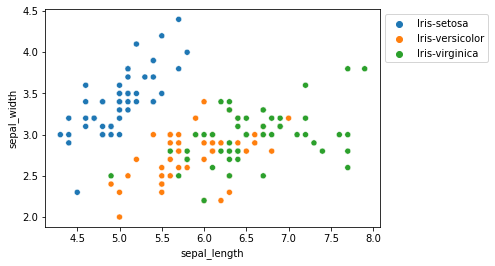

In [13]:
sns.scatterplot(x='sepal_length', y='sepal_width',
                hue='class', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

Here are the conculsions we can make from the plot above:
 - Iris-setosa species has smaller sepal lengths (not greate than 6.0 cm) but larger sepal widths(not less than 2.3 cm, with majority being around 3.4 cm).
 - Iris-virginica on the other hand is opposite of setosa species and has larger sepal lengths (not less than 6.0 cm ) but smaller sepal widths (not greater than 3.8 cm).
 - Iris-versicolor species falls somewhere in the middle of the other two species in terms of sepal length (not less than 5.0 cm) and width (not greater than 3.4 cm).
 <br>
 
 Now, lets compare petal length and petal width

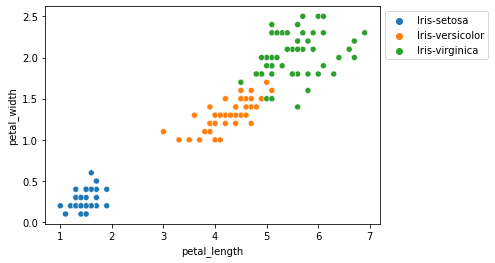

In [14]:
sns.scatterplot(x='petal_length', y='petal_width',
                hue='class', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

Here are the conculsions we can make from the plot above:
- Iris-setosa has both smaller petal lengths (not greater than 2 cm) and widths (not greater than 0.6 cm).
- Iris-virginica is again the opposite of Setosa and has the largest of petal lengths (not less than 4.5 cm) and widths (not less than 1.4 cm).
- Iris-versicolor species once again is in the middle of the other two species in terms of petal length and width.


**pairplot** function in seaborn is an excellent way of showing the correlation between different variables, a scatter plot of each pair of variables is created in a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. On the diagonal a univariate distribution plot is drawn to show the marginal distribution of the data in each column. [4]

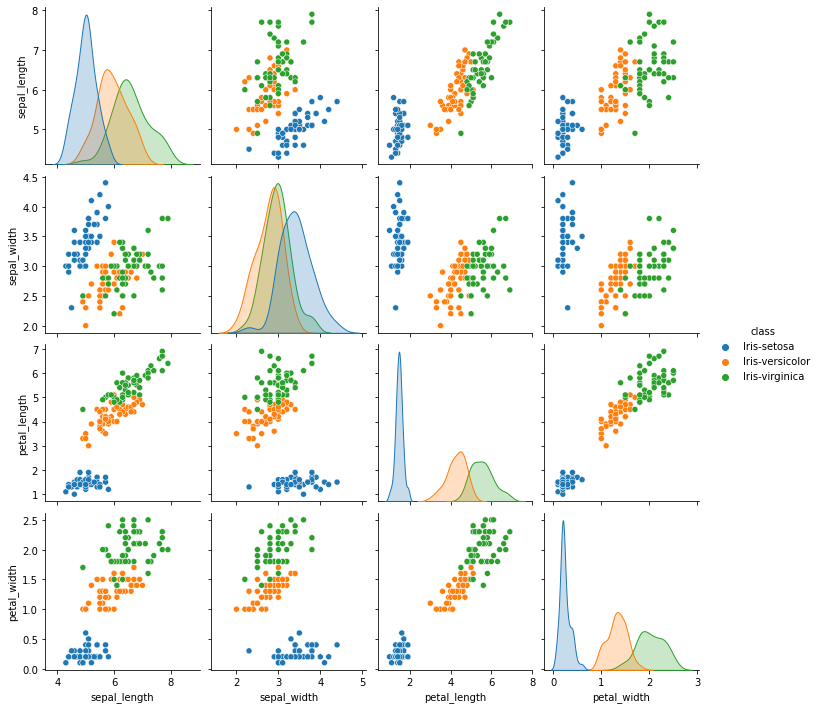

In [15]:
sns.pairplot(data=df, hue='class')


From the plot above we can see that the species Seotsa is very different compared to the other two species and is clearly distinguishable which is indeed has been confirmed many times before from various investigations into the data set. Iris-versicolor and Iris-virginica on the other hand have a lot of overlapping points which makes it difficult to separate them.

Histograms are a great way to see the distribution of data for various columns. The pandas **hist** function calls matplotlib.pyplot.hist on each numerical series in the DataFrame, resulting in one histogram per column. By specifying bins parameter we can choose how detailed the plot will be. The height of each bin shows how many values from that data fall into that range.
[5]

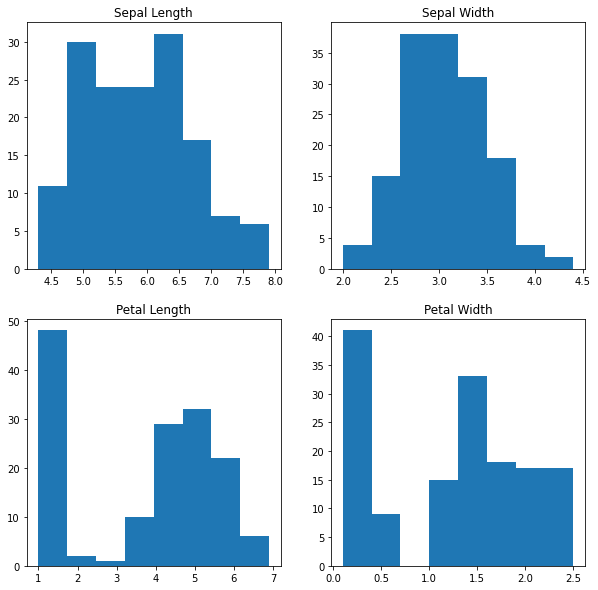

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
  
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal_length'], bins=8)
  
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal_width'], bins=8);
  
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal_length'], bins=8);
  
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal_width'], bins=8);

1.
2.
3. (geeksforgeeks.org)[https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/]
4. https://seaborn.pydata.org/generated/seaborn.pairplot.html
5. https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html